In [1]:
# Data Source: https://www.alphavantage.co
# API Key: EVMRD162IRCITXSI

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download stock historical data and visualize it
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.techindicators import TechIndicators
ts = TimeSeries(key='EVMRD162IRCITXSI',output_format='pandas')
fd=FundamentalData(key='EVMRD162IRCITXSI',output_format='pandas')
TI=TechIndicators(key='EVMRD162IRCITXSI',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata

In [4]:
# Download stock historical data
stock_data,stock_meta_data=ts.get_daily_adjusted('AAPL',outputsize='full')

In [5]:
# Download stock technical indicators
ema_data,ema_matadata=TI.get_ema('AAPL', interval='daily', time_period=20, series_type='close')
sma_data,sma_matadata=TI.get_sma('AAPL', interval='daily', time_period=20, series_type='close')
macd_data,macd_matadata=TI.get_macd('AAPL', interval='daily', series_type='close')
stoch_data,stock_matadata=TI.get_stoch('AAPL', interval='daily')

In [7]:
rsi_data,rsi_matadata=TI.get_rsi('AAPL', interval='daily', time_period=20)
obv_data,obv_matadata=TI.get_obv('AAPL', interval='daily')
cci_data,cci_matadata=TI.get_cci('AAPL', interval='daily', time_period=20)

In [9]:
aroon_data,aroon_matadata=TI.get_aroon('AAPL', interval='daily', time_period=20, series_type='close')
bbands_data,bbands_matadata=TI.get_bbands('AAPL', interval='daily', time_period=20,  series_type='close')
ad_data,ad_matadata=TI.get_ad('AAPL', interval='daily')

In [10]:
# Using the most recent five year historical stock price data for analysis

stock_price = stock_data[stock_data.index > '2000-04-01']['5. adjusted close']
ema_recent = ema_data[ema_data.index > '2000-04-01']['EMA']
sma_recent = sma_data[sma_data.index > '2000-04-01']['SMA']
macd_recent = macd_data[macd_data.index > '2000-04-01']['MACD']
obv_recent = obv_data[obv_data.index > '2000-04-01']['OBV']
rsi_recent = rsi_data[rsi_data.index > '2000-04-01']['RSI']
stoch_recent=stoch_data[stoch_data.index > '2000-04-01']['SlowD']
cci_recent=cci_data[cci_data.index > '2000-04-01']['CCI']
aroon_recent=aroon_data[aroon_data.index > '2000-04-01']['Aroon Up']
bbands_recent=bbands_data[bbands_data.index > '2000-04-01']['Real Middle Band']
ad_recent=ad_data[ad_data.index > '2000-04-01']['Chaikin A/D']

In [42]:
#candidate_features=stock_price.to_frame().join(ema_recent).join(macd_recent).join(obv_recent).join(rsi_recent)
candidate_features=stock_price.to_frame().join(ema_recent).join(sma_recent).join(macd_recent).join(obv_recent).join(rsi_recent).join(stoch_recent).join(cci_recent).join(aroon_recent).join(bbands_recent).join(ad_recent)
#candidate_features

# normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
normed_values=MinMaxScaler().fit_transform(candidate_features.values)
normed_candidate_features=pd.DataFrame(normed_values,columns=candidate_features.columns,index=candidate_features.index)

### Target data

In [13]:
target_feature=np.array(normed_candidate_features["5. adjusted close"])
target_feature

array([0.84920042, 0.84016326, 0.85368397, ..., 0.00561012, 0.00544474,
       0.00576796])

###     features data after normalized

In [14]:
normed_features=normed_candidate_features.iloc[:,1:].copy()
normed_features
#np.var(features_data, axis = 0)

,EMA,SMA,MACD,OBV,RSI,SlowD,CCI,Aroon Up,Real Middle Band,Chaikin A/D
date,,,,,,,,,,
2021-03-05,0.941222,0.945707,0.128614,0.930275,0.253851,0.364418,0.361260,0.15,0.945707,0.992990
2021-03-04,0.945588,0.951506,0.137481,0.928993,0.223809,0.495890,0.353740,0.20,0.951506,0.991754
2021-03-03,0.951421,0.956512,0.163151,0.930478,0.253027,0.561097,0.377397,0.25,0.956512,0.992492
2021-03-02,0.956361,0.961194,0.182871,0.931420,0.302868,0.478565,0.418118,0.30,0.961194,0.993546
2021-03-01,0.959430,0.964439,0.185244,0.932272,0.350623,0.421830,0.406773,0.35,0.964439,0.994558
...,...,...,...,...,...,...,...,...,...,...
2000-04-07,0.005825,0.005803,0.381869,0.217891,0.459313,0.516762,0.495927,0.45,0.005803,0.185197
2000-04-06,0.005812,0.005786,0.381943,0.215869,0.404449,0.498767,0.473788,0.50,0.005786,0.182750
2000-04-05,0.005838,0.005778,0.382446,0.218034,0.452434,0.451024,0.495206,0.55,0.005778,0.184539


# Filter based on variance

[0.03509659 0.03454983 0.0039211  0.10158812 0.03048757 0.06433968
 0.01929603 0.1336781  0.03454983 0.11135155]


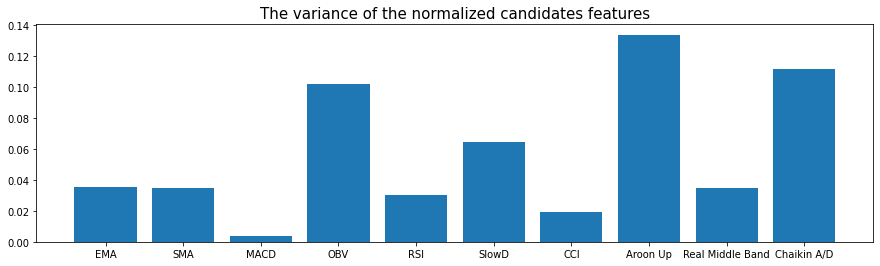

In [15]:
normed_var=np.var(normed_features.values, axis = 0)
normed_features_dict=dict(zip(normed_features.columns,normed_var))
fig = plt.figure(figsize=(15,4))#dpihttp://localhost:8888/notebooks/MSDM%206980%20Data%20Extraction%20API.ipynb#Filter-based-on-variance=70)
plt.bar(normed_features_dict.keys(),normed_features_dict.values())
plt.title("The variance of the normalized candidates features",fontsize=15)
print(normed_var)

In [16]:
sorted_item=sorted(normed_features_dict.items(), key = lambda kv:(kv[1], kv[0]))
left_keys=[key for key,value in sorted_item[3:]]
after_var_left=normed_features[left_keys].copy()
#after_var_left

# Filter based on correlation

In [17]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
 
# 代表选择特征值的数量
 
selectkBest=SelectKBest(f_regression,k=5)
 
# 调用fit方法进行最好特征的选择
 
bestFeature=selectkBest.fit_transform(after_var_left.values,target_feature)
 
# 查看关键因子
columns=after_var_left.columns[selectkBest.get_support()]
after_var_corr_left=after_var_left[columns]
after_var_corr_left

,Real Middle Band,SMA,EMA,OBV,Chaikin A/D
date,,,,,
2021-03-05,0.945707,0.945707,0.941222,0.930275,0.992990
2021-03-04,0.951506,0.951506,0.945588,0.928993,0.991754
2021-03-03,0.956512,0.956512,0.951421,0.930478,0.992492
2021-03-02,0.961194,0.961194,0.956361,0.931420,0.993546
2021-03-01,0.964439,0.964439,0.959430,0.932272,0.994558
...,...,...,...,...,...
2000-04-07,0.005803,0.005803,0.005825,0.217891,0.185197
2000-04-06,0.005786,0.005786,0.005812,0.215869,0.182750
2000-04-05,0.005778,0.005778,0.005838,0.218034,0.184539


# After PCA

In [36]:
from sklearn.decomposition import PCA

dataset=PCA(n_components=3).fit_transform(after_var_corr_left.values)
dataset

array([[ 1.08100947e+00,  9.94099335e-01,  6.68585244e-02],
       [ 1.08403252e+00,  1.00293999e+00,  6.77251340e-02],
       [ 1.08991660e+00,  1.01001207e+00,  6.90860129e-02],
       ...,
       [-6.60192952e-01,  1.18684194e-01, -4.27405400e-04],
       [-6.63800633e-01,  1.20846600e-01, -1.56443375e-03],
       [-6.61876192e-01,  1.19156182e-01,  3.73441180e-03]])

# 调整数据集顺序，使train集是历史数据

In [19]:
dataset = dataset[::-1]
y_list = target_feature[::-1]

In [20]:
# 划分数据集
train_size=int(len(dataset)*0.65)

train_list=dataset[:train_size]
test_list=dataset[train_size-1:]

y_train=y_list[:train_size]
y_test=y_list[train_size-1:]

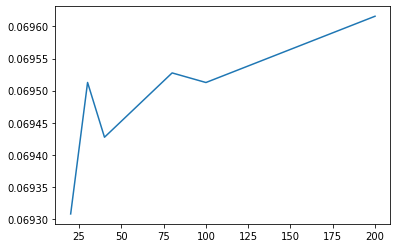

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# 找 mse 小的 n_estimators 参数
mse=[]
estimators_number = [20,30,40,80,100,200]
for i in estimators_number:
    regressor = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=0)
    regressor.fit(train_list, y_train)
    y_pred = regressor.predict(test_list)
    mse.append(metrics.mean_squared_error(y_test, y_pred))
    
plt.plot(estimators_number,mse)

In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(train_list)
X_test = sc.transform(test_list)

# 训练随机森林解决回归问题

regressor = RandomForestRegressor(n_estimators=25, oob_score=True, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error after StandardScaler:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error after StandardScaler:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error after StandardScaler: 0.17854787731537072
Mean Squared Error after StandardScaler: 0.06909167599465449


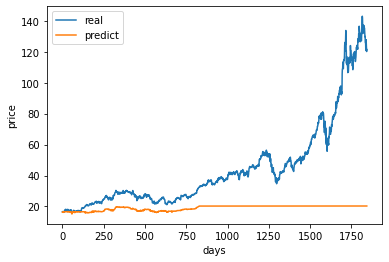

[PCA] Mean Squared Error before StandardScaler: 1407.8005800757119


In [63]:
#画图
# y=y_test
# y1=y_pred
y_original = stock_price.values
scaler=MinMaxScaler()
xxx = scaler.fit_transform(y_original.reshape(-1,1))
y=scaler.inverse_transform(y_test.reshape(-1,1))
y1=scaler.inverse_transform(y_pred.reshape(-1,1))

plt.plot(y,label='real')
plt.plot(y1,label='predict')
plt.ylabel('price')
plt.xlabel('days')
plt.legend()
plt.show()

print('[PCA] Mean Squared Error before StandardScaler:', metrics.mean_squared_error(y, y1))

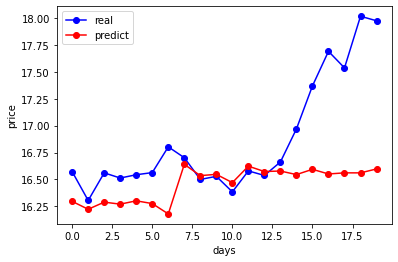

In [64]:
plt.plot(y[:20],'bo-',label='real')
plt.plot(y1[:20],'ro-',label='predict')
plt.ylabel('price')
plt.xlabel('days')
plt.legend()
plt.show()